In [1]:
include("../reconstruction_probability.jl")

reconstruction_probability (generic function with 1 method)

# Critical Noise

### Reconstruction probability
In order to compute the reconstruction probability, we proceed as follows:
- define a range of "perturb probability", for example `pp = range( 0.08, 0.58, length = 22 )`;
- then, for each $ p \in pp $:
    - generate a big number of indipendent samples $ \xi $ and initialize a counter;
        - select a random pattern from $ \xi $ perturb it with p and run the zero-temperatur Monte-Carlo;
        - if the final overlap with the original pattern is bigger or equal than 0.95, consider it as a success and update counter;
        - repeat for all the samples.
    - the reconstruction probability for $ p $ is just the fraction of successes.

reconstruction_probability(NN::AbstractVector,
    α;
    pp::AbstractVector = range( 0.08, 0.58, length = 22 ),
    nsweeps = 100,
    β = 10^3,
    nsamples = 5*10^2,
    earlystop = 0,
    thr = 0.95,
    show = false,
    save = true)

In [11]:
N = [1000] 
α = 0.1
@time reconstruction_probability(N, α; show = false, save = false, nsamples = 200, thr = 0.8)

365.753594 seconds (140.02 k allocations: 69.634 GiB, 1.81% gc time)


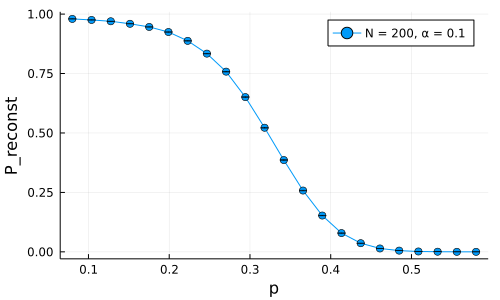

In [7]:
N = [200] 
α = 0.1
reconstruction_probability(N, α; show = true, save = false, nsamples = 10^5)

In [2]:
pp = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN70.txt")[:,1]
p70 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN70.txt")[:,2]
e70 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN70.txt")[:,3]

p250 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN250.txt")[:,2]
e250 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN250.txt")[:,3]

p500 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN500.txt")[:,2]
e500 = readdlm("../julia_data/reconstruction_prob/alpha_01/probsN500.txt")[:,3]

22-element Vector{Float64}:
 0.004874373707264981
 0.003987957825156936
 0.0034571525577583697
 0.004454175497072093
 0.005951709476392709
 0.006267260734501832
 0.00855911894029217
 0.012005008974630627
 0.015533272840269704
 0.020271503835075262
 0.022318338119870527
 0.020740596536488014
 0.015152927850580224
 0.008559118940292166
 0.0048743737072649805
 0.002825591608118863
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

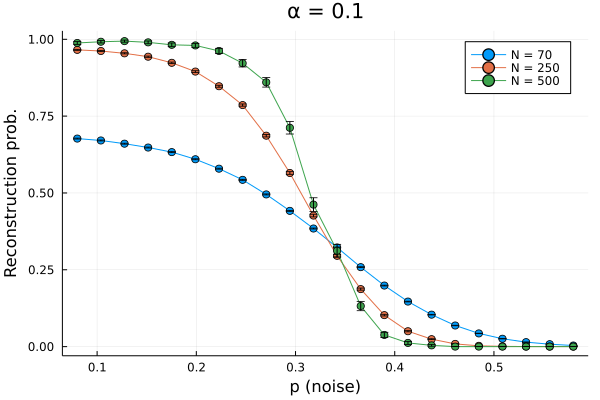

In [33]:
fig = plot(pp, [p70 p250 p500], markershape =:circle, yerrors = [e70 e250 e500],
    xlabel = "p (noise)", ylabel = "Reconstruction prob.", label = ["N = 70" "N = 250" "N = 500"],
    title = "α = 0.1")

In [3]:
pp = readdlm("../cluster_data/alpha_01/probsN100.txt")[:,1]

p100 = readdlm("../cluster_data/alpha_01/probsN100.txt")[:,2]
e100 = readdlm("../cluster_data/alpha_01/probsN100.txt")[:,3]

p1000 = readdlm("../cluster_data/alpha_01/probsN1000.txt")[:,2]
e1000 = readdlm("../cluster_data/alpha_01/probsN1000.txt")[:,3]

#p1500 = readdlm("../cluster_data/alpha_01/probsN1500.txt")[:,2]
#e1500 = readdlm("../cluster_data/alpha_01/probsN1500.txt")[:,3]

p2000 = readdlm("../cluster_data/alpha_01/probsN2000.txt")[:,2]
e2000 = readdlm("../cluster_data/alpha_01/probsN2000.txt")[:,3]

22-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0001428571428571429
 0.00014285714285714287
 0.0004514634032707079
 0.0013392122493951519
 0.0028794624507932874
 0.004982396823203573
 0.005944339106627994
 0.004356595487962787
 0.0019072435510528334
 0.000494482623100731
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

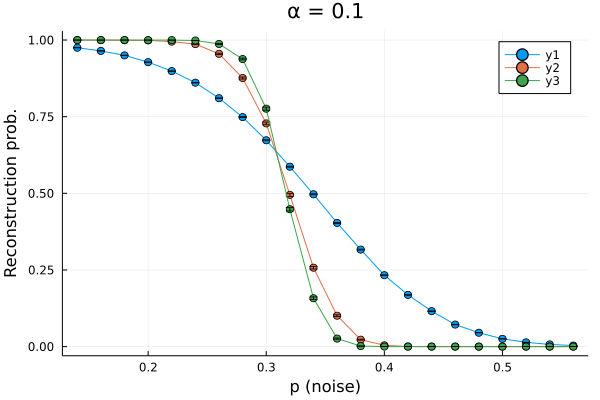

In [5]:
fig = plot(pp, [p100 p1000 p2000], markershape =:circle, yerrors = [e100 e1000 e2000],
    xlabel = "p (noise)", ylabel = "Reconstruction prob.",
    title = "α = 0.1")

In [26]:
N = 10000
α = 0.1
M = round(Int, N*α)
ξ = SH.generate_corr_patterns(M, N, 0.3)

σ = ξ[:, 1]
overlaps = (σ' * ξ) ./ N

1×1000 Matrix{Float64}:
 1.0  0.2924  0.2804  0.2824  0.308  0.296  …  0.2986  0.2946  0.2934  0.2832

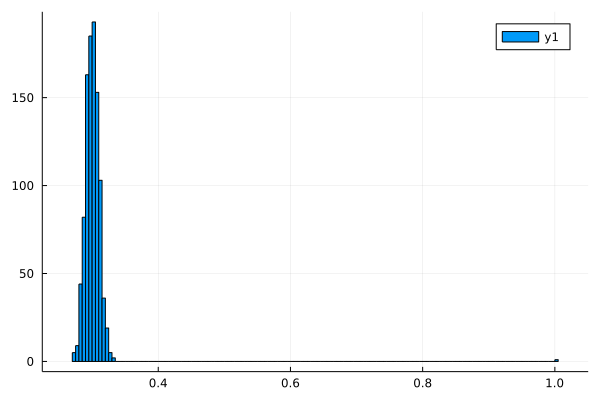

In [27]:
histogram(overlaps', nbins = 200)

In [42]:
a = Dict([("100", 1), ("200", 2)])

Dict{String, Int64} with 2 entries:
  "100" => 1
  "200" => 2

In [56]:
b = sort!(collect(keys(a)))
for i in b
    println(typeof(parse(Int64, i)))
end

Int64
Int64


In [63]:
αα = [0.12, 0.11, 0.08, 0.07, 0.05]

for α in αα
    folder = replace(string(α),"." => "" )
    pp = readdlm("julia_data/reconstruction_prob/corr_0/alpha_"*folder*"/probsN100.txt")[:,1]
    NN = [3000]
    reconstruction_probability(NN, α; show = false, save = true, nsamples = 2000, thr = 0.8, pp = pp)
end

[0.06, 0.08285714285714285, 0.10571428571428572, 0.12857142857142856, 0.15142857142857144, 0.1742857142857143, 0.19714285714285715, 0.22, 0.24285714285714285, 0.26571428571428574, 0.2885714285714286, 0.31142857142857144, 0.3342857142857143, 0.35714285714285715, 0.38, 0.40285714285714286, 0.4257142857142857, 0.44857142857142857, 0.4714285714285714, 0.4942857142857143, 0.5171428571428571, 0.54]
[0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54]
[0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56]
[0.24, 0.25333333333333335, 0.26666666666666666, 0.28, 0.29333333333333333, 0.30666666666666664, 0.32, 0.3333333333333333, 0.3466666666666667, 0.36, 0.37333333333333335, 0.38666666666666666, 0.4, 0.41333333333333333, 0.4266666666666667, 0.44, 0.4533333333333333, 0.4666666666666667, 0.48, 0.49333333333333335, 0.5066666666666667, 0.52]
[0.24, 0.2

In [209]:
function one_reconstruction_probability(N::Int, pp::AbstractVector, α, nsamples;
    nsweeps = 100,
    β = 10,
    earlystop = 0,
    thr = 0.95)

    M = round(Int, N * α)

    len_pp = length(pp)
    probs = zeros(len_pp)
    error_bars = zeros(len_pp)
    magnetization = zeros(len_pp)

    for i in 1:len_pp
        probs_over_samples = zeros(nsamples)        
        #count = 0
        ms = zeros(nsamples)
        
        for sample in 1:nsamples
            ξ = SH.generate_patterns(M, N)
            J = SH.store(ξ)
            
            k = rand(1:M)
            σ = ξ[:, k]
            σ_pert = SH.perturb(σ, pp[i])
                        
            σ_rec = SH.monte_carlo(J, σ_pert; nsweeps = nsweeps, earlystop = earlystop, β = β)
            
            m = SH.overlap(σ_rec, σ)
            #print(m)
            if m >= thr
                probs_over_samples[sample] = 1
                #count += 1
            end
            ms[sample] = m
        end
        probs[i] = Statistics.mean(probs_over_samples)
        error_bars[i] = Statistics.std(probs_over_samples)/sqrt(nsamples)
        magnetization[i] = Statistics.mean(ms)
    end

    return probs, error_bars, magnetization
end

180

In [80]:
function one_reconstruction_frequency(N::Int64, α::Float64, nsamples::Int64, pp::AbstractVector;
        nsweeps = 100, β = 10, earlystop = 0, m0 = 0.8)
    
    M  = round(Int, N * α)
    np = length(pp)
    
    freqs, ferrors, mags, merrors = zeros(np), zeros(np), zeros(np), zeros(np)
    
    for i in 1:np
        overlaps = zeros(nsamples)
        
        for sample in 1:nsamples
            ξ = SH.generate_patterns(M, N)
            J = SH.store(ξ)
            
            k = rand(1:M)
            σ = ξ[:, k]
            σ_pert = SH.perturb(σ, pp[i])
            
            σ_rec = SH.monte_carlo(σ_pert, J; nsweeps = nsweeps, earlystop = earlystop, β = β)
            overlaps[sample] = SH.overlap(σ_rec, σ)
        end
        success   = map(x -> x >= m0, overlaps)
        freqs[i]  = mean(success)
        ferrors[i] = std(success) / sqrt(nsamples)
        
        mags[i]   = mean(overlaps)
        merrors[i]= std(overlaps) / nsamples
    end
    return freqs, ferrors, mags, merrors            
end

function plotf(N::Int, α::Float64, pp::AbstractVector, f::AbstractVector)
    fig = plot(pp, f, size = (500,300), markershape =:circle, label = "N = $N, α = $α",
                    xlabel = "p", ylabel = "probs") 
    display(fig)
    return nothing
end

function savedata(N::Int, α::Float64, data::AbstractMatrix; dir = "julia_data")
    
    folder = replace(string(α),"." => "" )
    path = dir*"/alpha_"*folder
    
    if isdir(path)
        io = open(path*"/N"*"$N"*".txt", "w") do io
            writedlm(io, data)
        end
    else
        mkpath(path)
        io = open(path*"/N"*"$N"*".txt", "w") do io
            writedlm(io, data)
        end
    end
    return nothing
end

function reconstruction_frequencies(dd::AbstractVector, αα::AbstractVector;
        pp::AbstractVector = range( 0.14, 0.56, length = 22 ), m0 = 0.8, # one_rec_freq params
        nsweeps = 100, β = 15, earlystop = 0, # monte carlo params
        save = true, show = false, savedir = "julia_data")
    
    for α in αα
        for d in dd
            N, nsamples = d[1], d[2]
            f, ferr, m, merr = one_reconstruction_frequency(N, α, nsamples, pp; nsweeps = nsweeps, β = β, earlystop = earlystop, m0 = m0)
            
            data = [f ferr m merr]
            show == true && plotf(N, α, pp, f)
            save == true && savedata(N, α, data; dir = savedir)
            
        end    
    end
    return nothing
end

reconstruction_frequencies (generic function with 1 method)

In [81]:
αα = [0.03]
dd = [(100, 10^3), (200, 10^3)]
reconstruction_frequencies(dd, αα; save = true, savedir = "ciao")